In [95]:
### Objective
'''
1.Build out a portfolio A based on a traditional 60/40 asset allocation with bloomberg ticker LUATTRUU Index for the 40% bond allocation. 
The bloomberg terminal has monthly data starting 1973 and daily data starting in 1994. 
For the 60% equities, use bloomberg ticker SPXT Index with data starting in 1989 and SPX Index going back to 1973 (it would be nice but not necessary to find S&P 500 total return data prior to 1989).
'''

'\n1.Build out a portfolio A based on a traditional 60/40 asset allocation with bloomberg ticker LUATTRUU Index for the 40% bond allocation. \nThe bloomberg terminal has monthly data starting 1973 and daily data starting in 1994. \nFor the 60% equities, use bloomberg ticker SPXT Index with data starting in 1989 and SPX Index going back to 1973 (it would be nice but not necessary to find S&P 500 total return data prior to 1989).\n'

In [96]:
# Functions
def calc_percent(df):
    """
    Calculate the percentage change for each column in the DataFrame.
    """
    # Create an empty DataFrame to store percentage changes
    df_percent = pd.DataFrame(index=df.index)
    
    for col in df.columns:
        # Calculate percentage change and fill NaN with 0
        df_percent[col + '_pctchange'] = df[col].pct_change().fillna(0)
    
    return df_percent

def calc_pnl(df_percent):
    """
    Calculate the cumulative return (PnL) for each percentage change column in the DataFrame.
    """
    # Create an empty DataFrame to store cumulative returns
    cum_ret = pd.DataFrame(index=df_percent.index)
    
    for col in df_percent.columns:
        # Calculate cumulative return
        cum_ret[col.replace('_pctchange', '_pnl')] = (1 + df_percent[col]).cumprod()
    
    return cum_ret

In [97]:
# Packages Needed
import pandas as pd
import numpy as np
import quantstats as qs
qs.extend_pandas()

# Set pandas display precision to three decimal places
pd.options.display.float_format = '{:.3f}'.format

In [98]:
# Read in Data
data = pd.read_excel('equity_bond_gold.xlsx', na_values=['#N/A N/A'], sheet_name='equity_bond_gold_price')

# Rename the specified columns
data = data.rename(columns={
    'LUATTRUU Index': 'Bond',
    'SPXT Index': 'SP500_tr',
    'SPX Index': 'SP500',
    'XAU Curncy': 'Gold'
})

data

,Dates,Bond,SP500_tr,SP500,Gold
0,1973-02-01,98.990,NaN,114.760,65.140
1,1973-02-02,98.990,NaN,114.350,65.140
2,1973-02-05,98.990,NaN,114.230,65.140
3,1973-02-06,98.990,NaN,114.450,65.140
4,1973-02-07,98.990,NaN,113.660,65.140
...,...,...,...,...,...
13497,2024-10-28,2307.480,12751.220,5823.520,2742.460
13498,2024-10-29,2308.770,12771.800,5832.920,2774.740
13499,2024-10-30,2307.280,12729.730,5813.670,2787.610
13500,2024-10-31,2308.140,12493.740,5705.450,2743.970


In [99]:
df = data[data['Dates'] >= '1994-03-01']
df.head()

,Dates,Bond,SP500_tr,SP500,Gold
5498,1994-03-01,684.430,568.330,464.440,378.750
5499,1994-03-02,684.560,569.000,464.810,378.100
5500,1994-03-03,682.840,566.830,463.010,377.850
5501,1994-03-04,682.360,569.000,464.740,377.200
5502,1994-03-07,684.150,571.720,466.910,376.400


In [100]:
# Set the 'Dates' column as the index
df.set_index('Dates', inplace=True)

# Calculate percentage changes
df_percent = calc_percent(df)

# Calculate cumulative returns
cum_ret = calc_pnl(df_percent)

# Display the first few rows of each DataFrame
cum_ret.head()


,Bond_pnl,SP500_tr_pnl,SP500_pnl,Gold_pnl
Dates,,,,
1994-03-01,1.000,1.000,1.000,1.000
1994-03-02,1.000,1.001,1.001,0.998
1994-03-03,0.998,0.997,0.997,0.998
1994-03-04,0.997,1.001,1.001,0.996
1994-03-07,1.000,1.006,1.005,0.994


In [101]:
# Now for our 60/40 portfolio
df_percent['ports_pctchange'] = 0.6 * df_percent['SP500_pctchange'] + 0.4 * df_percent['Bond_pctchange']
cum_ret['ports_pnl'] = (1 + df_percent['ports_pctchange']).cumprod()
cum_ret.head(3)

,Bond_pnl,SP500_tr_pnl,SP500_pnl,Gold_pnl,ports_pnl
Dates,,,,,
1994-03-01,1.000,1.000,1.000,1.000,1.000
1994-03-02,1.000,1.001,1.001,0.998,1.001
1994-03-03,0.998,0.997,0.997,0.998,0.997


                    Benchmark    Strategy
------------------  -----------  ----------
Start Period        1994-03-02   1994-03-02
End Period          2024-11-01   2024-11-01
Risk-Free Rate      0.0%         0.0%
Time in Market      97.0%        97.0%

Cumulative Return   1,133.49%    752.26%
CAGR﹪              5.81%        4.94%

Sharpe              0.52         0.68
Prob. Sharpe Ratio  99.83%       99.99%
Sortino             0.74         0.97
Sortino/√2          0.52         0.69
Omega               1.14         1.14

Max Drawdown        -56.78%      -34.07%
Longest DD Days     2620         1562

Gain/Pain Ratio     0.11         0.14
Gain/Pain (1M)      0.63         0.86

Payoff Ratio        0.93         0.96
Profit Factor       1.11         1.14
Common Sense Ratio  1.04         1.11
CPC Index           0.56         0.59
Tail Ratio          0.94         0.97
Outlier Win Ratio   3.47         5.75
Outlier Loss Ratio  3.11         5.25

MTD                 0.41%        0.06%
3M          

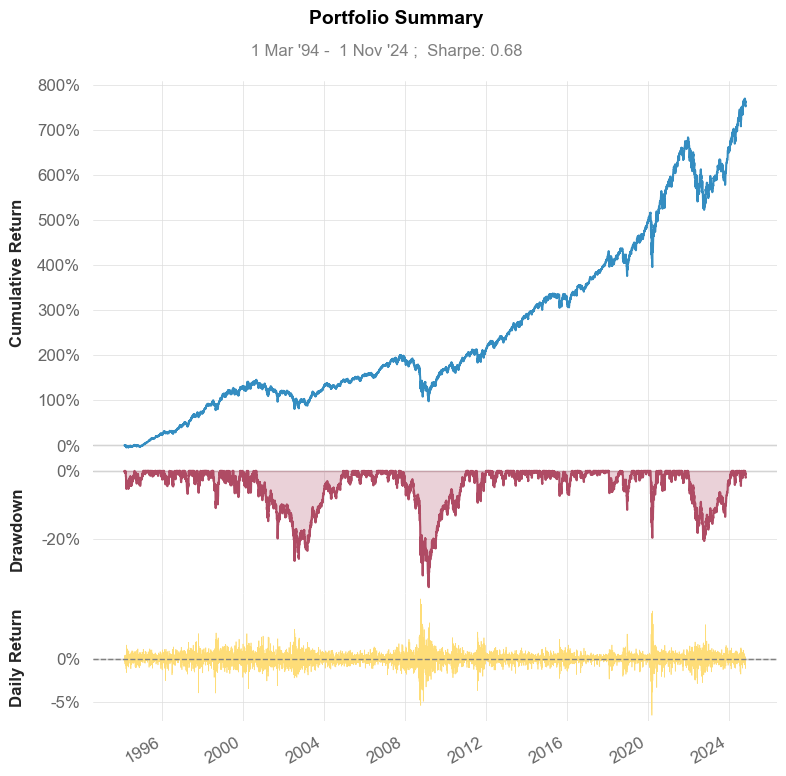

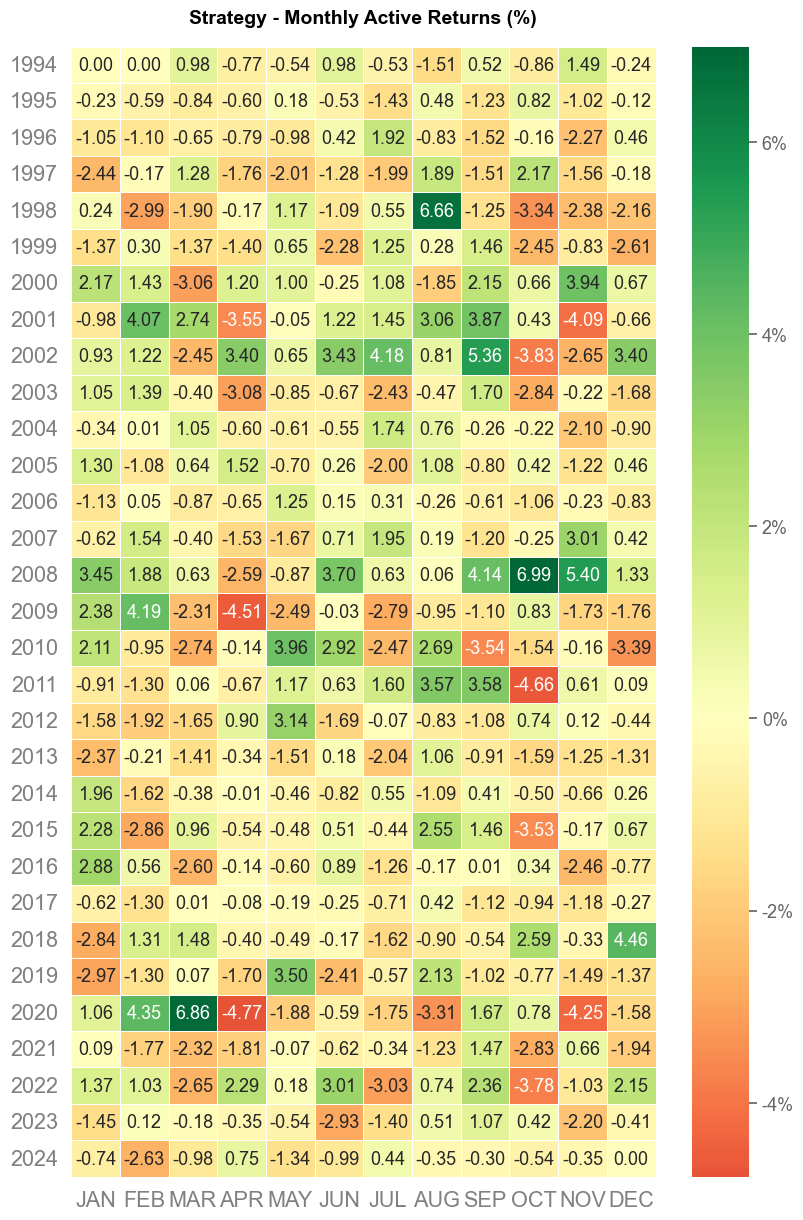

In [ ]:
# Basic Reporting
qs.reports.basic(cum_ret['ports_pnl'], benchmark=cum_ret[['SP500_pnl']], output='60_40PortfolioReport.html')